In [1]:
import pandas as pd
import spacy
from spacy import displacy
import numpy as np
import pickle as pk
import json

In [2]:
nlp = spacy.load('en_core_web_sm')

In [3]:
df = pd.read_csv("./data/df_chinese_yauatcha_reviews_train.csv")

In [4]:
df.head(5)

,rating,review,sentiment
0,5,Very nice Cantonese restaurant and actually pr...,1
1,4,I'm making my way through high-end Chinese res...,1
2,4,Great Asian restaurant in Soho!\nAmbiance is g...,1
3,3,For a true Asian - probably three star at its ...,-1
4,4,High end beautiful dim sum restaurant. Very fa...,1


In [5]:
ex=10
print (df["review"][ex])
print ("----------")
doc = nlp(df["review"][ex])  # 2nd sentence
for token in doc:
    print(token.text, token.dep_, token.head.text, token.head.pos_,
          [child for child in token.children])

Michelin star dim sum, that should be enough to get any dumpling lover in the door. They offer both entrees and dim sum style dumplings in a very chic modern style restaurant. Very fun atmosphere and they did become packed very fast upon our arrival.
They have very high quality dumplings served as you order them, no cart here. They come about 3 per order, more on some items. The selection is about as good as a dumpling house can get. Really fresh stuff and they stand out for a reason. I also tried their chicken soup which was excellent. They have awesome desserts, you can look as them on display. We tried the macaroons that were a lovely way to finish our meal.
The price was very fair for the location and accolades. I would definitely check them out.
----------
Michelin compound star NOUN []
star compound sum NOUN [Michelin]
dim amod sum NOUN []
sum intj be VERB [star, dim]
, punct be VERB []
that nsubj be VERB []
should aux be VERB []
be ROOT be VERB [sum, ,, that, should, enough, .]


In [6]:
displacy.render(doc, style='dep', jupyter=True, options = { 'distance':80 })

In [7]:
sentt = []
for idno, sentence in enumerate(doc.sents):
    print ('Sentence {}:'.format(idno + 1), sentence)
    sentt.append(sentence)
doc_1 = sentt[1]  # let's use this statement for further analysis

Sentence 1: Michelin star dim sum, that should be enough to get any dumpling lover in the door.
Sentence 2: They offer both entrees and dim sum style dumplings in a very chic modern style restaurant.
Sentence 3: Very fun atmosphere and they did become packed very fast upon our arrival.

Sentence 4: They have very high quality dumplings served as you order them, no cart here.
Sentence 5: They come about 3 per order, more on some items.
Sentence 6: The selection is about as good as a dumpling house can get.
Sentence 7: Really fresh stuff
Sentence 8: and they stand out for a reason.
Sentence 9: I also tried their chicken soup which was excellent.
Sentence 10: They have awesome desserts, you can look as them on display.
Sentence 11: We tried the macaroons that were a lovely way to finish our meal.

Sentence 12: The price was very fair for the location and accolades.
Sentence 13: I would definitely check them out.


In [8]:
displacy.render(doc_1, style='dep', jupyter=True, options = { 'distance':80 })

In [9]:
def getRoot(sentence):
    depy=[]
    print ("Input sentence is: " + str(sentence))
    for tok in sentence:
        dep =  (tok.text, tok.dep_, "---> ", tok.head.text)
        print (dep)
        depy.append(dep)
    root = list(filter(lambda x : x[1]=="ROOT", depy))
    if len(root) == 0 : return 999
    return root
  #  print (possible_subject, possible_subject.dep_, possible_subject.head.pos_)
  #  if possible_subject.dep == "nsubj" and possible_subject.head.pos == "VERB":
  #      verbs.add(possible_subject.head)

doc = "John likes an apple"
for sentence in nlp(doc).sents:
    root = getRoot(sentence)
print ("The root is :" + str(root))

Input sentence is: John likes an apple
('John', 'nsubj', '---> ', 'likes')
('likes', 'ROOT', '---> ', 'likes')
('an', 'det', '---> ', 'apple')
('apple', 'dobj', '---> ', 'likes')
The root is :[('likes', 'ROOT', '---> ', 'likes')]


In [10]:
def getTriples(root, sentence):
    depy=[]
    #print (root)
    for tok in sentence:  # tokenize it again
        dep =  (tok.text, tok.dep_, "---> ", tok.head.text)
        depy.append(dep)
    subj = list(filter(lambda x : x[1]=="nsubj", depy))
    #print (subj)
    obj = list(filter(lambda x : x[1]=="dobj", depy))
    #print (obj)
    #print ("root is" + str(root))
    try: 
        triples = (subj[0][0], root[0][0], obj[0][0])
    except IndexError:
        print ("Grammar incorrect. No triples for " + str(sentence))
        print ("Grammar is " + str(depy))
        return None
    return triples

triples=[]
doc = "John likes big apple. The apple tastes delicious."
#doing it sentence by sentence
for sentence in nlp(doc).sents:
    root = getRoot(sentence)  # obtain root of one sentence
    if root != 999 : 
        triple = getTriples(root, sentence)  # obtain triples in that sentence
        print ("Triple is " + str(triple))
   # triples.append(triple)

Input sentence is: John likes big apple.
('John', 'nsubj', '---> ', 'likes')
('likes', 'ROOT', '---> ', 'likes')
('big', 'amod', '---> ', 'apple')
('apple', 'dobj', '---> ', 'likes')
('.', 'punct', '---> ', 'likes')
Triple is ('John', 'likes', 'apple')
Input sentence is: The apple tastes delicious.
('The', 'det', '---> ', 'apple')
('apple', 'nsubj', '---> ', 'tastes')
('tastes', 'ROOT', '---> ', 'tastes')
('delicious', 'dobj', '---> ', 'tastes')
('.', 'punct', '---> ', 'tastes')
Triple is ('apple', 'tastes', 'delicious')


In [49]:
# entity & aspect categories
# From Frequency approach
aspect = {
    "food": [
        "noodles", "food", "dumplings", "dumpling", "pork", "flavour", "chili", "duck",    
        "dishes", "dish", "lunch", "bun", "shrimp", "dimsum", "rice", "chicken", "soup", "chow",
        "msg", "tea", "meal", "drink", "drinks", "eat", "delish", "tasted", "taste", "daal",
        "naan", "flavorful", "tasty", "murgh", "malai", "ruby", "chops", "sandwich",
        "toast", "espresso", "lassi", "breakfast", "breakfasts", "dinner", "cocktails", "cocktail", "whiskey",
        "vegetarian", "biryani", "delicious", "kulfi", "dessert", "desserts", "cuisine", "lentils", "cooked",
        "cook", "seasoned", "kebab", "potatoes", "potato", "lamb", "onion", "onions", "bao", 
        "dim", "cognac", "mai", "bun", "beef", "macaroons", "macaroon"
    ],
    "service" : [
        "staff", "workers", "waiter", "rude", "wait", "waited", "waiting", "water", "queue", "service", 
        "seated", "turn away", "experience", "reservations", "reservation", "bartender"
    ],
    "ambience": [
        "furniture", "bathroom", "decoration", "floors", "tables", "table", "seat", "seating", "flatware",
        "decor", "ambience", "vibe", "crowded", "loud", "ambiance", "design", "interior", "chic", "modern",
        "atmosphere"
    ],
    "price" : ["price", "prices", "priced", "cost", "cheap", "cheaper", "expensive"]
}
# overall : will be everything else    
# Helper function for categorising aspects:
def aspectCat(sentence):
    category=[]
    for tok in sentence:
        tok = tok.text.lower()
        for key, val in aspect.items():
            if tok in val: category.append(key)
    if len(category) == 0 : category.append("overall")
    return category

In [51]:
reviews_sent =[] 
# reloading vectoriser & svm classifier
# note it is important that the classifier is trained on the vectoriser and so is the test set
vectorizer = pk.load(open("./models/vectorise.pk","rb"))
classifier_svm = pk.load(open("./models/classifier_svm.pk", "rb"))  # load the previously trained SVM classifier

def getSentiment(span):
    res = 0.0
    # print (span)
    test_transform = vectorizer.transform([span.text])
    res=classifier_svm.predict(test_transform)
    # print(res)
    return res

ex=20
doc = nlp(df["review"][ex])
for idx, sentence in enumerate(doc.sents):
    # print(sentence)
    res = getSentiment(sentence)
    try:
        cat = aspectCat(sentence)      
        reviews_sent.append({"scores":list(res), "text":sentence, "category":cat})
    except IndexError:
        # there are no specific aspects talked about. Just in general
        reviews_sent.append({"scores":list(res), "text":sentence, "category":"overall"})
print(reviews_sent)

[{'scores': [1], 'text': This is a must visit if you can, this is just an absolute experience that is hard to compare to anything i have ever tried, the quality of the food, the craftsmanship, the flavors so delicious and delicate is almost overwhelming!
, 'category': ['service', 'food', 'food']}, {'scores': [-1], 'text': And when it comes to service this is second to none, you feel just whiskered into another universe where attention to your meal and enjoyment is the sole purpose.
, 'category': ['service', 'food']}, {'scores': [-1], 'text': The only thing with this place that I regret is that i am not there right now., 'category': ['overall']}]


/Users/davidleonardi/anaconda3/lib/python3.7/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.19.1 when using version 0.19.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/davidleonardi/anaconda3/lib/python3.7/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.19.1 when using version 0.19.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/davidleonardi/anaconda3/lib/python3.7/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator SVC from version 0.19.1 when using version 0.19.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [52]:
reviews = {}
for i in range(len(df["review"])):
    doc = nlp(df["review"][i])
    reviews_sent =[] 
    for idx, sentence in enumerate(doc.sents):
        #print (sentence)
        res = str(getSentiment(sentence))
        try:
            cat = aspectCat(sentence)      
            reviews_sent.append({"scores":res, "text":sentence.text, "category":cat})
        except IndexError:
            reviews_sent.append({"scores":res, "text":sentence.text, "category":"overall"})
    reviews[i]=reviews_sent

# set of all reviews
fname = "./data/dependency_parsing/dp_chinese_yauatcha_reviews.json"
ffile = open(fname, "w")
json.dump(reviews, ffile)
ffile.close()
#print (reviews)

print ("-----------")

# summarise all reviews
summary_scores = {"overall":[], "service":[], "price":[], "food":[], "ambience": []}
# count total no of 
for key, val in reviews.items():
    #print (val)
    for i in val:
        score = eval(i["scores"])[0]
        summary_scores[i["category"][0]].append(score)

# print (summary_scores)
for key, val in summary_scores.items():
    #avg = round(np.mean(val),2)
    pos = np.sum(np.array(val) >= 0, axis=0)
    neg = np.sum(np.array(val) < 0, axis=0)
   # print (val)
   # try:
   #     nb = len(val)
   # except TypeError                                  :
    #    nb = 1
    summary_scores[key]={"pos":pos,"neg": neg, "nb talked": pos + neg}
#summary_scores["total no of reviews"]=len(reviews)
print (summary_scores)
df_summary = pd.DataFrame(summary_scores)

-----------
{'overall': {'pos': 942, 'neg': 696, 'nb talked': 1638}, 'service': {'pos': 206, 'neg': 172, 'nb talked': 378}, 'price': {'pos': 48, 'neg': 71, 'nb talked': 119}, 'food': {'pos': 1132, 'neg': 497, 'nb talked': 1629}, 'ambience': {'pos': 143, 'neg': 94, 'nb talked': 237}}


In [53]:
df_summary = pd.DataFrame(summary_scores )

df_summary=df_summary.transpose()
df_summary.columns=[ "total", "negative", "positive"]
df_summary["category"] = df_summary.index
df_summary.append(pd.Series([1,2,3,"dummy"]),ignore_index = True)
print(df_summary)

          total  negative  positive  category
overall    1638       696       942   overall
service     378       172       206   service
price       119        71        48     price
food       1629       497      1132      food
ambience    237        94       143  ambience


          total  negative  positive  category
price       119        71        48     price
ambience    237        94       143  ambience
service     378       172       206   service
food       1629       497      1132      food
overall    1638       696       942   overall


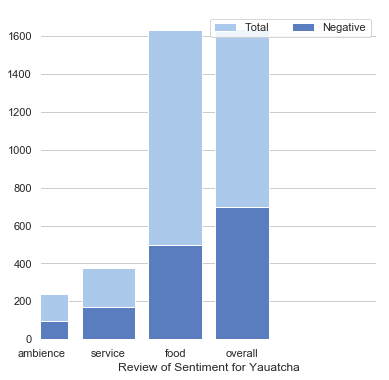

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 6))
df_summary = df_summary.sort_values("total")
print(df_summary)
# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="category", y="total", data=df_summary,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="category", y="negative", data=df_summary,
            label="Negative", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(1, 6), ylabel="",
       xlabel="Review of Sentiment for Yauatcha")
sns.despine(left=True, bottom=True)

# Conclusion

Based on the aspect mining result, we got to know that Yauatcha restaurant get relatively positive reviews from their customer (Positive: 61.76%). They get good reviews for their food quality (Positive: 69.49%) as well as their nice restaurant ambience (60.34%). This restaurant is considered pricy by most of its patron.